##Principal component analysis PCA

In [1]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the data

In [ ]:

# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration5-40000samples_Kohonen/atriumSimplifiedSDA+ASE+View_v4_40000samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
#data = data.dropna(axis=0)



### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  40000 non-null  float64
 1   typicalFacadeWindowWidth   40000 non-null  float64
 2   groundFacadeGlazingRatio   40000 non-null  float64
 3   groundFacadeWindowWidth    40000 non-null  float64
 4   buildingDepth              40000 non-null  float64
 5   balconyWidth               40000 non-null  float64
 6   atriumArea                 40000 non-null  float64
 7   aspectRatio                40000 non-null  float64
 8   groundFloorHeight          40000 non-null  float64
 9   typicalfloorHeight         40000 non-null  float64
 10  numberLevels               40000 non-null  float64
 11  groundSDA                  40000 non-null  float64
 12  firstSDA                   40000 non-null  float64
 13  groundASE                  40000 non-null  flo

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  40000 non-null  float64
 1   typicalFacadeWindowWidth   40000 non-null  float64
 2   groundFacadeGlazingRatio   40000 non-null  float64
 3   groundFacadeWindowWidth    40000 non-null  float64
 4   buildingDepth              40000 non-null  float64
 5   balconyWidth               40000 non-null  float64
 6   atriumArea                 40000 non-null  float64
 7   aspectRatio                40000 non-null  float64
 8   groundFloorHeight          40000 non-null  float64
 9   typicalfloorHeight         40000 non-null  float64
 10  numberLevels               40000 non-null  float64
 11  groundSDA                  40000 non-null  float64
 12  firstSDA                   40000 non-null  float64
 13  groundASE                  40000 non-null  flo

In [ ]:
data=data.drop(['typicalFacadeGlazingRatio','groundFacadeGlazingRatio'], axis = 1)

In [ ]:
# Print the first 5 rows
data.head()

,typicalFacadeWindowWidth,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
0,0.700,0.600,1.000,0.900,19.100,0.100,0.600,0.800,0.200,1.700,2.200,1.200,1.200,1.500,1.800
1,0.400,1.000,1.300,0.300,55.400,0.700,1.000,0.500,0.600,4.100,3.600,2.700,1.500,4.100,3.500
2,0.500,1.000,1.400,0.600,61.700,0.700,0.300,0.300,0.200,4.700,4.100,2.800,1.300,4.000,3.900
3,1.000,0.500,1.500,0.500,67.600,0.900,1.200,0.600,0.900,5.400,4.800,2.800,2.000,4.500,3.900
4,0.400,0.600,0.900,0.800,79.800,0.300,1.100,0.300,0.400,5.100,5.300,3.700,1.800,4.700,4.900


In [ ]:
# Descriptive statistics
data.describe()

,typicalFacadeWindowWidth,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
count,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,1.466,1.589,13.811,1.369,1439.047,0.826,3.332,2.093,3.917,49.167,42.274,22.868,11.881,52.624,50.414
std,0.299,0.382,6.027,0.371,577.589,0.207,0.891,0.455,1.241,16.880,14.839,9.282,4.129,14.300,13.740
min,0.200,0.200,0.900,0.100,19.100,0.100,0.300,0.200,0.200,1.700,2.200,1.200,1.200,1.500,1.800
25%,1.300,1.300,9.300,1.100,1033.600,0.700,2.800,1.800,3.200,38.900,33.200,16.700,9.200,43.500,41.600
50%,1.500,1.600,13.600,1.400,1443.950,0.800,3.200,2.100,3.900,45.400,39.000,21.200,11.000,52.900,50.900
75%,1.700,1.800,16.300,1.600,1692.300,1.000,3.700,2.400,4.400,57.400,49.700,27.900,13.900,60.700,58.400
max,2.000,3.000,39.800,2.900,3942.000,1.300,6.000,3.100,9.900,100.000,99.300,61.300,31.600,89.900,89.700


In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='aspectRatio')

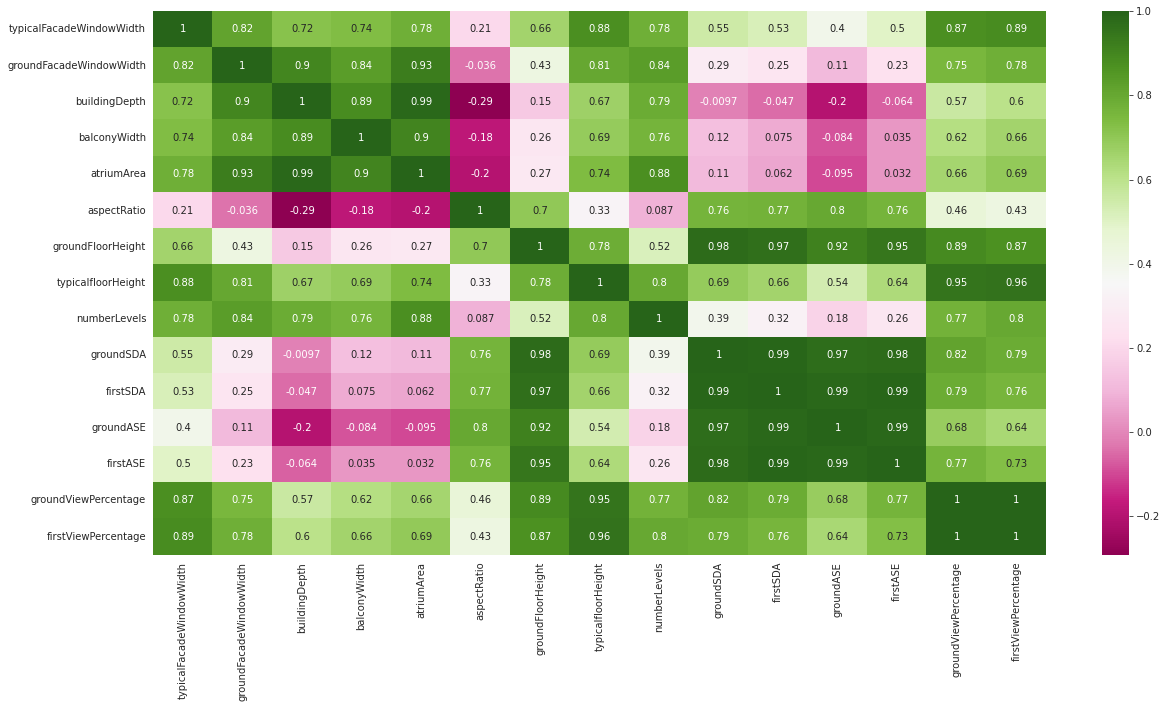

In [ ]:
# And lastly, a correlation plot
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG", ax=ax)

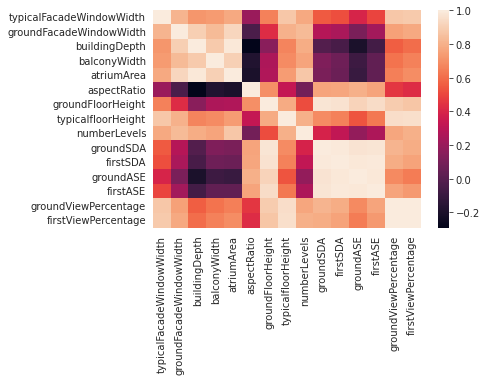

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

,typicalFacadeWindowWidth,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
count,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.231,-3.639,-2.142,-3.423,-2.458,-3.499,-3.402,-4.161,-2.995,-2.812,-2.701,-2.335,-2.587,-3.575,-3.538
25%,-0.555,-0.757,-0.748,-0.727,-0.702,-0.607,-0.597,-0.644,-0.578,-0.608,-0.611,-0.665,-0.649,-0.638,-0.641
50%,0.113,0.029,-0.035,0.082,0.008,-0.125,-0.148,0.015,-0.014,-0.223,-0.221,-0.180,-0.213,0.019,0.035
75%,0.781,0.554,0.413,0.622,0.438,0.839,0.413,0.675,0.389,0.488,0.500,0.542,0.489,0.565,0.581
max,1.784,3.698,4.312,4.127,4.334,2.285,2.993,2.214,4.822,3.011,3.843,4.141,4.776,2.607,2.859


### Executing PCA

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fit the model
model.fit(data_scaled)

PCA()

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)
#data_num_reduced_df["species"] = data["species"]

print(data_num_reduced_df)

          0      1      2      3      4      5      6      7      8      9   \
0     10.581  0.757  1.808  0.047 -0.702 -0.198  0.025  0.612 -0.020 -0.244   
1     10.239 -0.736 -0.861 -0.156  0.974  0.701  0.647  0.213  0.365  0.089   
2     10.407 -0.376 -0.756  0.626  0.534  0.564  1.057  0.061 -0.320  0.230   
3      9.426 -1.004 -1.389  0.863  0.356 -1.344  0.028  0.023  0.408 -0.227   
4     10.542 -0.144  0.871 -0.322 -0.761  0.473  0.738 -0.349  0.304 -0.126   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995  4.372 -0.227  0.801 -0.766 -0.069  0.110 -0.255  0.118 -0.049  0.112   
39996  3.911 -1.037 -1.022  0.567  0.421 -0.292  0.175 -0.026  0.349  0.097   
39997  3.832 -0.846 -0.993  0.821  0.012  0.202 -0.243  0.402  0.286  0.043   
39998  3.971 -0.448  0.117 -0.214  0.607 -0.249 -0.127  0.562  0.230  0.046   
39999  4.333 -0.654 -0.333  0.176  0.117 -0.914  0.096 -0.192  0.037  0.053   

          10     11     12     13     14  
0      0

### Inspecting Results

In [ ]:
sns.pairplot(data, hue='')

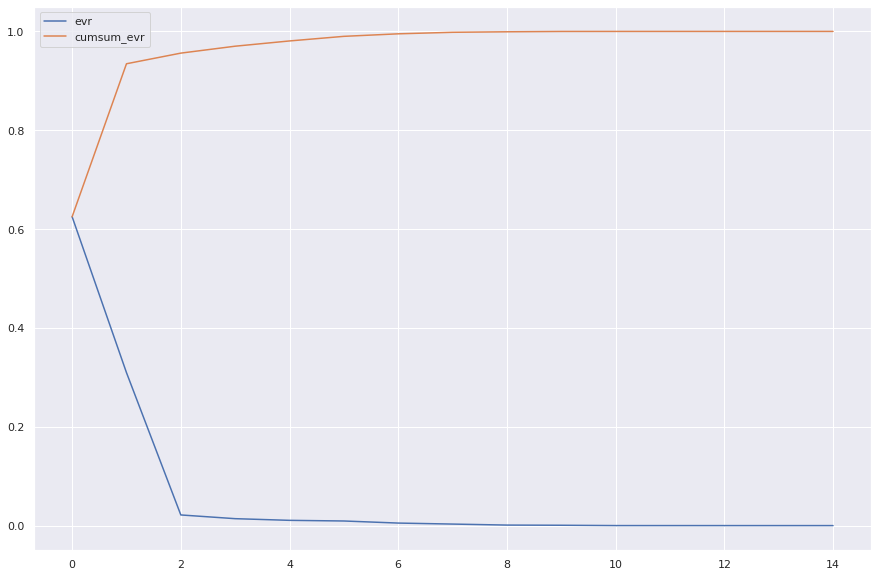

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[6.24987243e-01 3.09542764e-01 2.15334940e-02 1.40071308e-02
 1.06296824e-02 9.31338797e-03 5.10723377e-03 3.07426305e-03
 1.03506328e-03 6.91758441e-04 3.94480920e-05 2.00422050e-05
 8.27080377e-06 5.59476979e-06 4.62308587e-06]


PLOTTING ALL THE PCS

In [ ]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'black', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

No handles with labels found to put in legend.


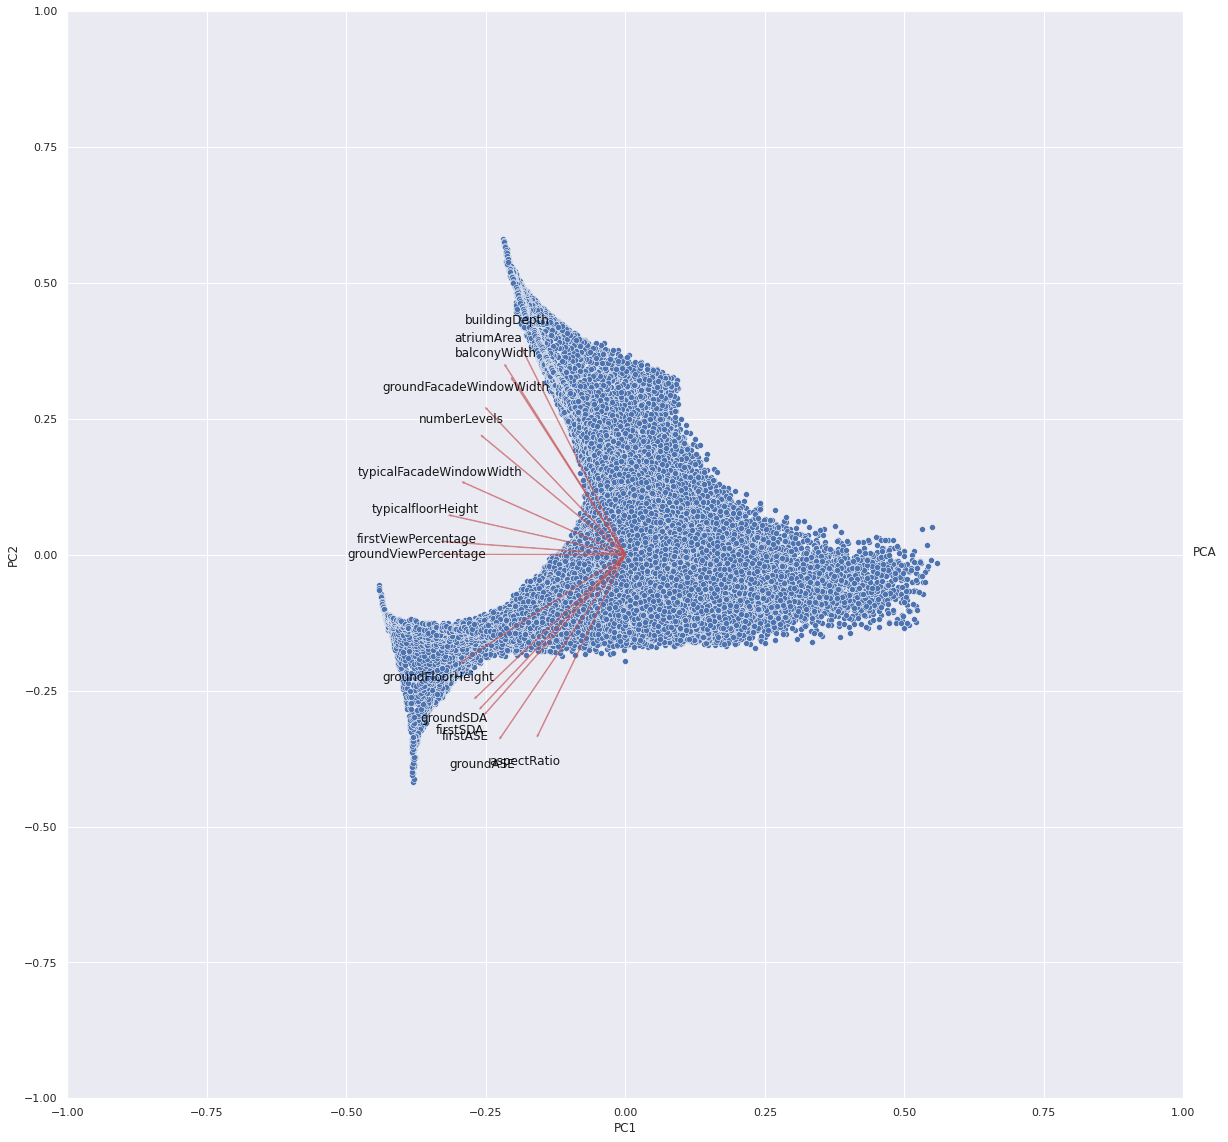

In [ ]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()

fig.set_size_inches(20, 20)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

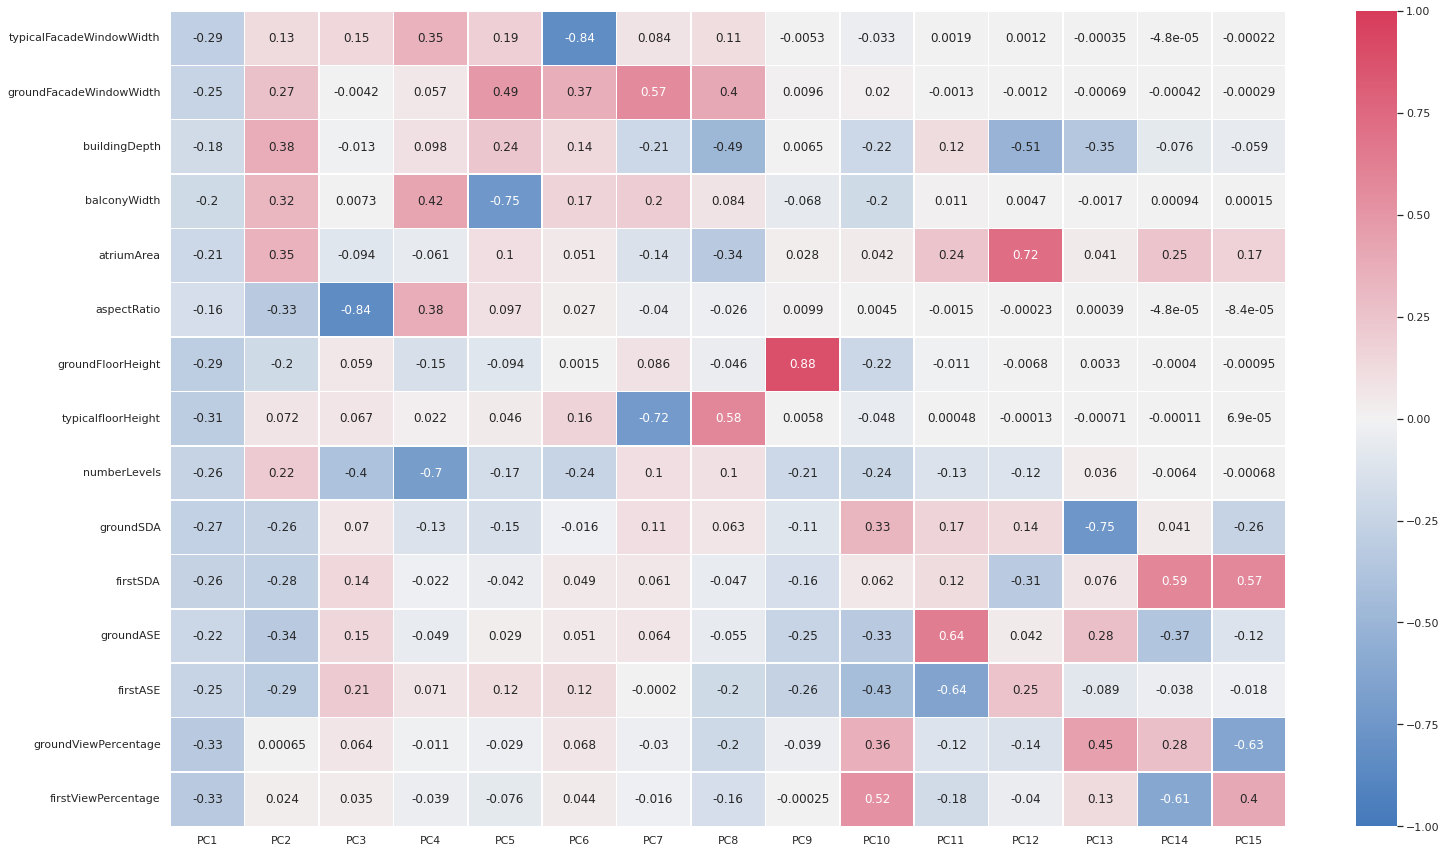

In [ ]:
#cmap="viridis"
#cmap="crest"
#cmap="mako"
#cmap=pal
pal = sns.diverging_palette(250, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap=pal, vmin=-1, vmax=1, annot=True)

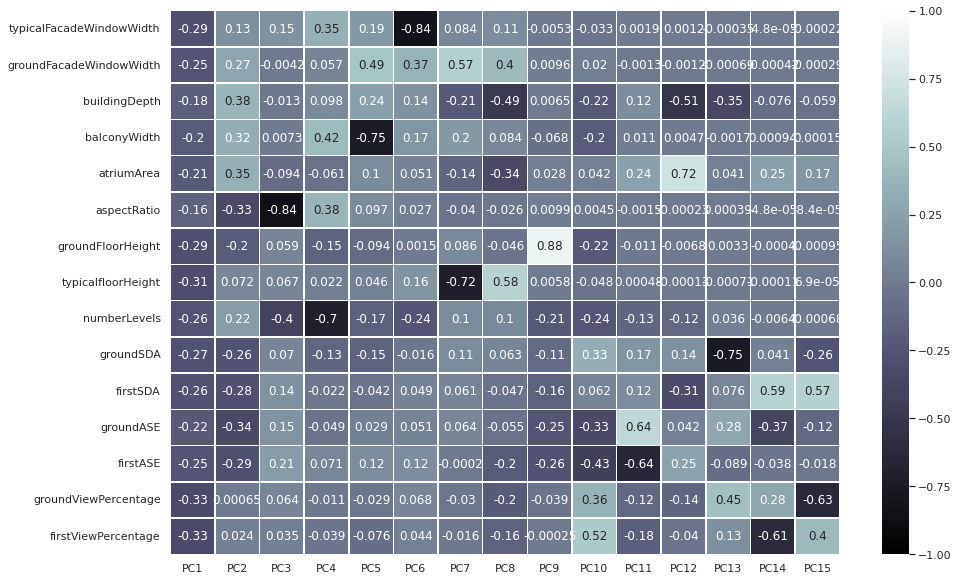

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                         1
0    PC0      groundViewPercentage
1    PC1             buildingDepth
2    PC2               aspectRatio
3    PC3              numberLevels
4    PC4              balconyWidth
5    PC5  typicalFacadeWindowWidth
6    PC6        typicalfloorHeight
7    PC7        typicalfloorHeight
8    PC8         groundFloorHeight
9    PC9       firstViewPercentage
10  PC10                  firstASE
11  PC11                atriumArea
12  PC12                 groundSDA
13  PC13       firstViewPercentage
14  PC14      groundViewPercentage
